In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

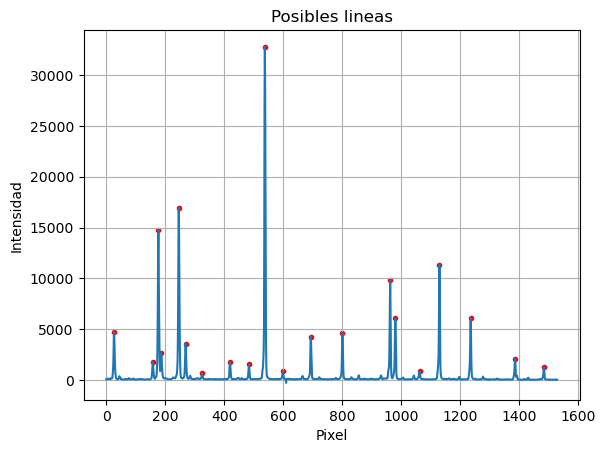

In [95]:
def Data(l):
    data = pd.read_csv(l, delimiter=' ')
    return data

def Spectrum(datax,datay):
    marker_x = []
    marker_y = []
    index_y = []
    index_x = []

    for i in range(0,len(datax)):
        mark = i

        if mark != 0 and mark != len(datax)-1:
            last = datay[mark - 1]
            next = datay[mark + 1]

            #Hallar máximos de espectro
            if (last < datay[i]) and (next < datay[i]) and (datay[i]>525):
                marker_x.append(datax[i])
                marker_y.append(datay[i])

                index_y.append( datay[i-5:i+5] )
                index_x.append( datax[i-5:i+5] )
                
    return marker_x,marker_y,index_x,index_y

datos = Data(r"C:\Users\clauw\Documents\Programming\Torium-Operation\th 6200 orden 2 spec.txt")

pixel = np.array(datos['P'])
intensidad = np.array(datos['I'])
marker_x,marker_y, index_x,index_y = Spectrum(pixel,intensidad)

plt.plot(pixel,intensidad)
plt.scatter(marker_x,marker_y,marker='.',color = 'red')
plt.title('Posibles lineas')
plt.xlabel('Pixel')
plt.ylabel('Intensidad')
plt.grid()

In [96]:
#Ajuste de Lorentz

def Lorentzian(x,h,x0,W):
    return h*W**2/((x-x0)**2+W**2)

def AjusteLorentz(i):
    x = index_x[i]
    y = index_y[i] 
    x_1 = np.linspace(x[0],x[-1],500 )

    popt, _ = curve_fit(Lorentzian,x,y) 
    h = popt[0]
    x0 = popt[1]
    w = popt[2]

    fit_y= Lorentzian(x_1,h,x0,w)

    return x0,h,fit_y,x_1, x, y

# plt.plot(fitx,fity, '--',color='b')
# plt.scatter(x,y)

Datafit = pd.DataFrame()
lineasfit = []
alturafit = []
catalog_long = [0,0,0,0,6172.28,0,0,6178.43,0,6182.62,0,0,6191.91]
catalog_pix = [0,0,0,0,6172.28,0,0,6178.43,0,6182.62,0,0,6191.91]

for i in range(0,13):
    linea,altura, fity, fitx, x, y = AjusteLorentz(i)
    lineasfit.append(linea)
    alturafit.append(altura)
    
Datafit['Lineas'] = lineasfit
Datafit['Instensidad'] = alturafit
Datafit['Catalogo'] = catalog_long

Datafit

,Lineas,Instensidad,Catalogo
0,26.740411,4964.083742,0.00
1,158.048073,1839.313012,0.00
2,177.006047,15251.149884,0.00
3,186.870802,2527.376517,0.00
4,246.173499,17644.525869,6172.28
5,269.332821,3691.874620,0.00
6,325.242123,688.956720,0.00
7,419.738282,1932.584027,6178.43
8,483.944365,1607.886872,0.00
9,538.166626,35032.850859,6182.62
